In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = (8,8)

In [2]:
df1 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df1["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [5]:
df1.shape

(5110, 12)

In [6]:
df1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df2['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [10]:
df2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df2['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [12]:
df2.drop('id',axis=1,inplace = True)

C:\Users\Suhana\AppData\Local\Temp\ipykernel_6708\1738419783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('id',axis=1,inplace = True)


In [13]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


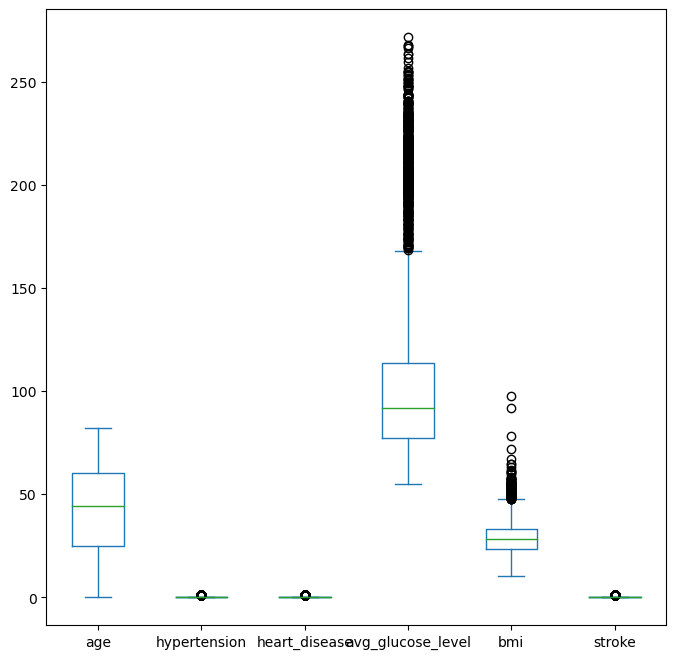

In [14]:
df2.plot(kind='box')
plt.show()

In [15]:
df2['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [16]:
df2[df2['avg_glucose_level']>113.570000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.8,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.8,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [18]:
df2['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['gender'] = le.fit_transform(df2['gender'])
df2['ever_married'] = le.fit_transform(df2['ever_married'])
df2['work_type'] = le.fit_transform(df2['work_type'])
df2['smoking_status'] = le.fit_transform(df2['smoking_status'])
df2['Residence_type'] = le.fit_transform(df2['Residence_type'])

C:\Users\Suhana\AppData\Local\Temp\ipykernel_6708\3241172783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = le.fit_transform(df2['gender'])
C:\Users\Suhana\AppData\Local\Temp\ipykernel_6708\3241172783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ever_married'] = le.fit_transform(df2['ever_married'])
C:\Users\Suhana\AppData\Local\Temp\ipykernel_6708\3241172783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [20]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


In [22]:
X = df2.drop('stroke', axis='columns')
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [23]:
y = df2.stroke
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1147,1,37.0,0,0,1,2,0,78.42,29.9,2
1414,1,78.0,0,1,1,3,1,228.70,34.0,0
2723,0,31.0,0,0,0,2,1,89.11,51.9,3
370,1,44.0,0,0,1,2,0,74.91,37.5,2
86,1,61.0,0,1,1,2,0,111.81,27.3,3
...,...,...,...,...,...,...,...,...,...,...
4260,1,64.0,0,0,1,2,1,62.21,28.3,0
4354,0,34.0,0,0,0,2,0,94.37,38.1,2
645,1,53.0,0,0,1,3,1,76.36,29.8,0
1435,0,54.0,0,1,1,2,1,140.28,37.1,1


In [25]:
y_train

1147    0
1414    0
2723    0
370     0
86      1
       ..
4260    0
4354    0
645     0
1435    0
1630    0
Name: stroke, Length: 3927, dtype: int64

In [26]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3231,0,57.0,0,0,1,0,1,104.36,19.2,3
4404,1,73.0,0,0,1,2,1,101.58,35.9,2
3853,0,47.0,0,0,1,3,0,157.77,28.4,2
2318,0,51.0,1,0,1,2,1,173.96,31.2,1
3995,1,45.0,0,0,1,2,0,95.62,29.5,3
...,...,...,...,...,...,...,...,...,...,...
4842,1,1.8,0,0,0,4,1,153.31,17.1,0
3497,0,37.0,0,0,1,2,1,100.22,22.7,3
2740,1,15.0,0,0,0,1,0,79.59,28.4,0
3494,0,66.0,0,0,1,2,1,112.77,22.7,3


In [27]:
y_test

3231    0
4404    0
3853    0
2318    0
3995    0
       ..
4842    0
3497    0
2740    0
3494    0
3583    0
Name: stroke, Length: 982, dtype: int64

In [28]:
df2.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [29]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [30]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.fit_transform(X_test)

In [32]:
import pickle
import os

In [35]:
std

StandardScaler()

In [36]:
scaler_path=os.path.join('C:\stroke prediction project','model/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [ ]:
X_train_std

In [ ]:
X_test_std

# model training

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy" , random_state=0)
classifier.fit(X_train_std,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
classifier.feature_importances_

array([0.02092118, 0.33047697, 0.0207635 , 0.01664351, 0.01743557,
       0.02249231, 0.02758957, 0.27002571, 0.20579104, 0.06786064])

In [39]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [40]:
y_pred=classifier.predict(X_test_std)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3231,0,57.0,0,0,1,0,1,104.36,19.2,3
4404,1,73.0,0,0,1,2,1,101.58,35.9,2
3853,0,47.0,0,0,1,3,0,157.77,28.4,2
2318,0,51.0,1,0,1,2,1,173.96,31.2,1
3995,1,45.0,0,0,1,2,0,95.62,29.5,3
...,...,...,...,...,...,...,...,...,...,...
4842,1,1.8,0,0,0,4,1,153.31,17.1,0
3497,0,37.0,0,0,1,2,1,100.22,22.7,3
2740,1,15.0,0,0,0,1,0,79.59,28.4,0
3494,0,66.0,0,0,1,2,1,112.77,22.7,3


In [42]:
y_test

3231    0
4404    0
3853    0
2318    0
3995    0
       ..
4842    0
3497    0
2740    0
3494    0
3583    0
Name: stroke, Length: 982, dtype: int64

In [43]:
y_train

1147    0
1414    0
2723    0
370     0
86      1
       ..
4260    0
4354    0
645     0
1435    0
1630    0
Name: stroke, Length: 3927, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score
dt_data_accuracy=accuracy_score(y_test,y_pred)
dt_data_accuracy

0.9103869653767821

In [47]:
import joblib
model_path=os.path.join('C:\stroke prediction project','model/decisiontree.sav')
joblib.dump(classifier,model_path)

['C:\\stroke prediction project\\model/decisiontree.sav']

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std, y_train)

In [ ]:
y_pred_lr=lr.predict(X_test_std)
y_pred_lr

In [ ]:
lr_data_accuracy=accuracy_score(y_test,y_pred_lr)
print("ACCURACY OF TRAIN DATA : " ,lr_data_accuracy )

In [ ]:
lr_data_accuracy

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_std,y_train)

In [ ]:
y_pred=knn.predict(X_test_std)

In [ ]:
knn_data_accuracy=accuracy_score(y_test,y_pred)
knn_data_accuracy

# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_std,y_train)

In [ ]:
y_pred=classifier.predict(X_test_std)
y_pred

In [ ]:
rf_data_accuracy=accuracy_score(y_test,y_pred)
rf_data_accuracy

# SVM

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(X_train_std,y_train)

In [ ]:
y_pred=classifier.predict(X_test_std)
y_pred

In [ ]:
svm_data_accuracy=accuracy_score(y_test,y_pred)
svm_data_accuracy

In [ ]:
knn_data_accuracy

In [ ]:
rf_data_accuracy

In [ ]:
lr_data_accuracy

In [ ]:
dt_data_accuracy

In [ ]:
plt.bar(['Decision Tree','Logistic Regression','KNN','Random Forest','SVM'],[dt_data_accuracy,lr_data_accuracy,knn_data_accuracy,rf_data_accuracy,svm_data_accuracy])
plt.xlabel("Algorithms")  
plt.ylabel("Accuracy") 
plt.show()

In [ ]:
import pickle
with open('stroke_prediction.pickle','wb') as f:
    pickle.dump(y_pred_lr,f)